BUSINESS UNDERSTANDING

The goal of this project is to analyze the AviationData.csv dataset to provide valuable insights that will guide in identifying which aviation engines are best, the most affected years and months by aviation accidents and the most affected countries.

PROBLEM STATEMENT

This analysis aims to explore the AviationData dataset to assess an aircraft operations project viability analysis. In particular, the analysis will assess the incidence of airplane accidents, assess the risk involved in the accidents, countries worst hit out of such accidents and compare survival rates in the aftermath of such accidents.

OBJECTIVES

1. Figure out the relationship between engine type and the frequency of accidents.
2. Identify the most affected year by airplane accidents.
3. Identify the months in which the most accidents occur.
4. Investigate survival rates after the accidents.
3. Generate visualizations that give insights and findings from the analysis.

RESEARCH QUESTIONS

1. How does the engine type correlate with accident frequency?
2. How do accident rates vary by year and month? Are there any identifiable patterns over time?
3. Which countries are the most affected by aviation accidents?

### DATA UNDERSTANDING:
Getting to know and understand what the dataset contains.

In [270]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [271]:
#reading the csv dataset.
#setting the encoding to latin1 for compatibility
#Using low_memory=false to prevent warnings about inconsistent data types
Aviation_df = pd.read_csv('AviationData.csv', encoding='latin1', low_memory= False)

In [272]:
#This gets the first 10 columns of the dataset
Aviation_df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [273]:
#Getting summary information about our dataset.
Aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [274]:
#Show basic summary statistics for each column with numbers
Aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [275]:
#returns a tuple showing the dimensions of the D
Aviation_df.shape

(88889, 31)

### DATA ANALYSIS

In [276]:
#Checking for total missing data in every column
columns_total_null = Aviation_df.isna().sum()
columns_total_null

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [277]:
#Checking for any duplicates
Aviation_df.duplicated().value_counts()

False    88889
dtype: int64

In [278]:
# Fill missing values (NaN) in specific columns of the DataFrame
#Setting NaNs to 0

Aviation_df = Aviation_df.fillna({'Total.Fatal.Injuries': 0, 'Total.Serious.Injuries':0, 'Total.Minor.Injuries':0, 'Total.Uninjured':0, 'Number.of.Engines':0})

In [279]:
#Replacing missing values in the Aircraft damage/Phase of flight column
Aviation_df = Aviation_df.fillna({'Aircraft.damage': 'Unknown', 'Broad.phase.of.flight': 'Unknown'})

In [280]:
#Additional replacement of missing values
Aviation_df = Aviation_df.fillna({'Country': 'Undefined', 'Location': 'Unknown', 'Injury.Severity': 'Unknown', 'Model': 0, 'Make': 'Unknown', 'Purpose.of.flight': 'Unknown', 'Engine.Type': 'Unknown','Amateur.Built': 'Undefined', 'Weather.Condition': 'Unknown',})

In [281]:
#show columns in the dataset
Aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [282]:
# Drop columns that contain many NaN values
Aviation_df= Aviation_df.drop(columns=['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description',
                   'Schedule', 'Air.carrier'])
df.head()

,Event-Id,Investigation-Type,Accident-Number,Event-Date,Location,Country,Injury-Severity,Aircraft-damage,Registration-Number,Make,...,Engine-Type,Purpose-of-flight,Total-Fatal-Injuries,Total-Serious-Injuries,Total-Minor-Injuries,Total-Uninjured,Weather-Condition,Broad-phase-of-flight,Report-Status,Publication-Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [283]:
Aviation_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Injury.Severity               0
Aircraft.damage               0
Registration.Number        1317
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status              6381
Publication.Date          13771
dtype: int64

In [284]:
Aviation_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

In [285]:
# Substitute dots in column names with hyphen
Aviation_df.columns = Aviation_df.columns.str.replace('.', '-')

In [286]:
# Converting 'Event-Date' and 'Publication-Date' to datetime format
Aviation_df['Event-Date'] = pd.to_datetime(Aviation_df['Event-Date'], errors='coerce')
Aviation_df['Publication-Date'] = pd.to_datetime(Aviation_df['Publication-Date'], errors='coerce', dayfirst=True)

In [287]:
#Converting datatype for number of engines to intager.
Aviation_df['Number-of-Engines']=Aviation_df['Number-of-Engines'].astype(int)

In [288]:
Aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event-Id                88889 non-null  object        
 1   Investigation-Type      88889 non-null  object        
 2   Accident-Number         88889 non-null  object        
 3   Event-Date              88889 non-null  datetime64[ns]
 4   Location                88889 non-null  object        
 5   Country                 88889 non-null  object        
 6   Injury-Severity         88889 non-null  object        
 7   Aircraft-damage         88889 non-null  object        
 8   Registration-Number     87572 non-null  object        
 9   Make                    88889 non-null  object        
 10  Model                   88889 non-null  object        
 11  Amateur-Built           88889 non-null  object        
 12  Number-of-Engines       88889 non-null  int32 

## Visualizations 

In [289]:
#Creating a summary table counting occurrences of each Engine-Type
Summary_data = Aviation_df.pivot_table(aggfunc='size', index='Engine-Type', fill_value=0)
print(Summary_data)

Engine-Type
Electric              10
Geared Turbofan       12
Hybrid Rocket          1
LR                     2
NONE                   2
None                  19
Reciprocating      69530
Turbo Fan           2481
Turbo Jet            703
Turbo Prop          3391
Turbo Shaft         3609
UNK                    1
Unknown             9128
dtype: int64


1. Line graph:Engine vs Accidents

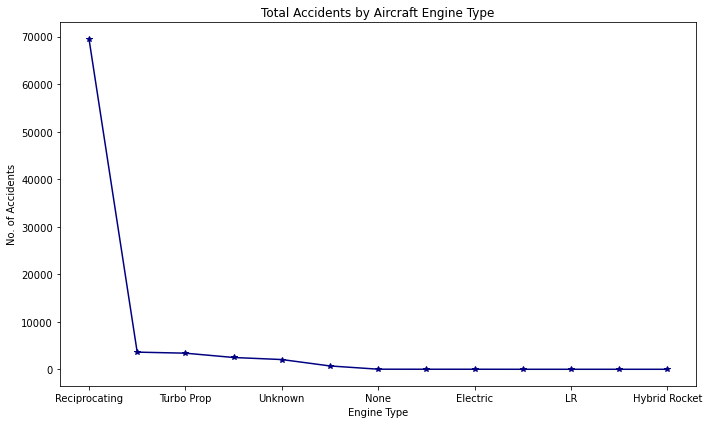

In [290]:
# Number of accidents for each Engine Type
engine_accident_count = df['Engine-Type'].value_counts()

# Plot the line graph
plt.figure(figsize=(10, 6))
engine_accident_count.plot(kind='line', marker='*', color='navy')

# Adding labels and title
plt.title('Total Accidents by Aircraft Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('No. of Accidents')


# Show the plot
plt.tight_layout()
plt.show()

2. Line Graph: Total accidents vs Year

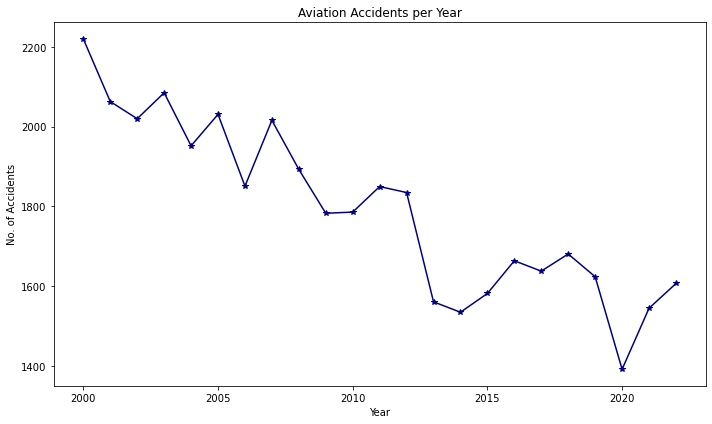

In [291]:
Aviation_df['Event-Date'] = pd.to_datetime(Aviation_df['Event-Date'], errors='coerce')

# Extract the year from the 'Event-Date' column
Aviation_df['Year'] = Aviation_df['Event-Date'].dt.year

# Filter the data to only include incidents from 2000 to 2022
Aviation_df_filtered = Aviation_df[(Aviation_df['Year'] >= 2000) & (Aviation_df['Year'] <= 2022)]

# Group the data by year and count the number of incidents per year
Grouped_by_Year = Aviation_df_filtered.groupby('Year').size()

# Plot the incidents per year as a line chart
Grouped_by_Year.plot(kind='line', color='navy', marker='*', figsize=(10, 6))

# Title and labels of the Graph
plt.title('Aviation Accidents per Year')
plt.xlabel('Year')
plt.ylabel('No. of Accidents')

# Show the plot
plt.tight_layout()
plt.show()

3. Bar Graph: Number of Accidents vs Month

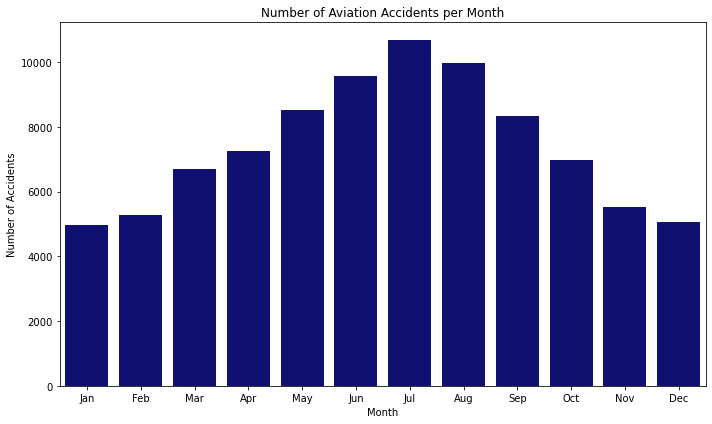

In [292]:
# Create a new column for month abbreviations
#dt.strftime('%b') to show abbreviated month
Aviation_df['Month.Abbr'] = Aviation_df['Event-Date'].dt.strftime('%b')


# Create the count plot
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='Month.Abbr', color='navy', order=month_order, data=Aviation_df)
plot.set(xlabel='Month', ylabel= 'Number of Accidents', title='Number of Aviation Accidents per Month')


# Show the plot
plt.tight_layout()
plt.show()

4. Bar Graph for survival rates

In [293]:
Aviation_df_selected = Aviation_df[['Total-Uninjured', 'Total-Fatal-Injuries', 'Total-Serious-Injuries', 'Total-Minor-Injuries']].sum()

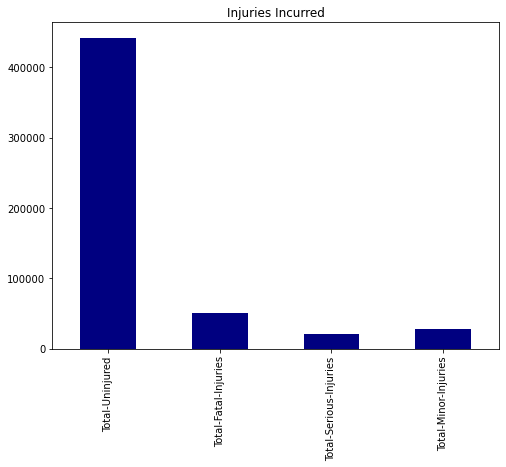

In [294]:
Aviation_df_selected.plot(kind='bar', figsize=(8, 6), color='navy', title="Injuries Incurred")
plt.ylabel('')
plt.show()

4. Bar Graph: Number of Accidents vs country

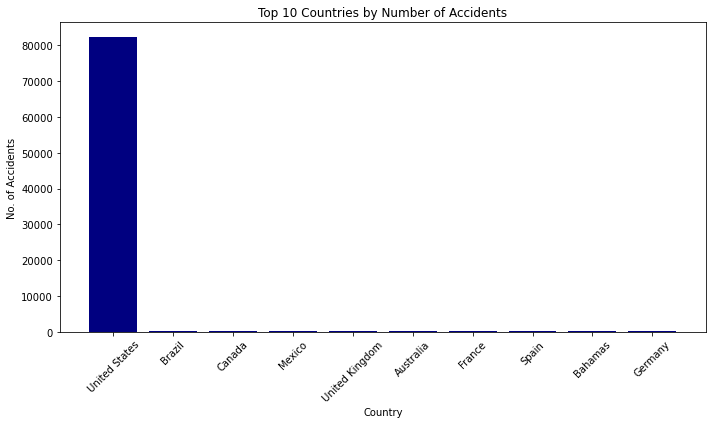

In [295]:
#Top ten countries
top_countries = df['Country'].value_counts().head(10)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(top_10_states.index, top_10_states.values, color='navy')
plt.title('Top 10 Countries by Number of Accidents')
plt.xlabel('Country')
plt.ylabel('No. of Accidents')

#to avoid country names from overlapping
plt.xticks(rotation=45)
#display the plot
plt.tight_layout()
plt.show()